# Data analysis: Diode full-wave rectification

## Load packages

In [1]:
import matplotlib
import matplotlib.pyplot as plt  # importar a bilioteca pyplot para fazer gráficos
from matplotlib import colors
#Comandos opcionais para formatar gráfico
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 12}	
lines = {'linewidth' : 3.0}
figure = {'figsize' : [6.0, 6/1.6]}
matplotlib.rc('font', **font)
matplotlib.rc('lines', **lines)
matplotlib.rc('figure', **figure)

import numpy as np   # importar a biblioteca Numpy para lidar com matrizes
import pandas as pd   # importa bilioteca pandas para  lidar com processamento de dados
import os #com
import glob
from scipy.optimize import curve_fit # pacote para ajuste de curvas
# navegar pelas pastas

## Getting the list of files

If you want to find out in which folder your located at the moment, use the command `os.getcwd()`:

In [2]:
os.getcwd() # aonde estou?

'/Users/gsw/GitHub/F540_jbook/guides/exp2/dados'

This is important because it may affect how you load data in the cell below:

* The command `path = os.getcwd()` will assign to the variable `path` the current folder
* **If your data files are within this folder**, then you should be able to load them right away


In [3]:
#Colocando nomes das pastas e arquivos
path = os.getcwd()
print(path)

/Users/gsw/GitHub/F540_jbook/guides/exp2/dados


* `glob.glob('*')` will list all files in current folder, including *subfolders*:

In [4]:
glob.glob('*')

['dados_onda_completa',
 'dados_meia_onda.zip',
 'dados_onda_completa.zip',
 'analise_meia_onda_teoria_fig.png',
 '001_meia_onda_c_R_330.dat',
 'analisa_dados_diodo.ipynb']

* I know my data is within the `dados_onda_completa` folder, so I will list the files within it.
* Im Unix OS (Mac and Linux), I will provide the string `dados_onda_completa/*`. But in Windows, it will need to be `dados_onda_completa\*`. 
* To make sure this command will work regardless of you OS, I will explore the command `os.path.join`, which will determine automatically whether `/` or `\` is to be used: 

In [5]:
os.path.join('dados_onda_completa','*')

'dados_onda_completa/*'

In [6]:
file_list = sorted(glob.glob(os.path.join('dados_onda_completa','*')))
print(file_list)

['dados_onda_completa/013_onda_completa_R_330.dat', 'dados_onda_completa/013_onda_completa_R_330_fig.png', 'dados_onda_completa/014_onda_completa_C_R_330.dat', 'dados_onda_completa/014_onda_completa_C_R_330_fig.png', 'dados_onda_completa/015_onda_completa_C_R_352.dat', 'dados_onda_completa/015_onda_completa_C_R_352_fig.png', 'dados_onda_completa/016_onda_completa_C_R_412.dat', 'dados_onda_completa/016_onda_completa_C_R_412_fig.png', 'dados_onda_completa/017_onda_completa_C_R_510.dat', 'dados_onda_completa/017_onda_completa_C_R_510_fig.png', 'dados_onda_completa/018_onda_completa_C_R_610.dat', 'dados_onda_completa/018_onda_completa_C_R_610_fig.png', 'dados_onda_completa/019_onda_completa_C_R_820.dat', 'dados_onda_completa/019_onda_completa_C_R_820_fig.png', 'dados_onda_completa/020_onda_completa_C_R_1000.dat', 'dados_onda_completa/020_onda_completa_C_R_1000_fig.png', 'dados_onda_completa/021_onda_completa_C_R_1200.dat', 'dados_onda_completa/021_onda_completa_C_R_1200_fig.png', 'dados_on

* Note usage of the python fucntion `sorted()` to sort the files in increasing name order.
* The list above is fine and we can access its content using integer indexes (starting at zero):

In [7]:
file_list[0]

'dados_onda_completa/013_onda_completa_R_330.dat'

* Instead, I will use the command `pd.Series(file_list)` from the Pandas package, this will show the file names with the corresponding indexes:

In [8]:
pd.Series(file_list)

0       dados_onda_completa/013_onda_completa_R_330.dat
1     dados_onda_completa/013_onda_completa_R_330_fi...
2     dados_onda_completa/014_onda_completa_C_R_330.dat
3     dados_onda_completa/014_onda_completa_C_R_330_...
4     dados_onda_completa/015_onda_completa_C_R_352.dat
5     dados_onda_completa/015_onda_completa_C_R_352_...
6     dados_onda_completa/016_onda_completa_C_R_412.dat
7     dados_onda_completa/016_onda_completa_C_R_412_...
8     dados_onda_completa/017_onda_completa_C_R_510.dat
9     dados_onda_completa/017_onda_completa_C_R_510_...
10    dados_onda_completa/018_onda_completa_C_R_610.dat
11    dados_onda_completa/018_onda_completa_C_R_610_...
12    dados_onda_completa/019_onda_completa_C_R_820.dat
13    dados_onda_completa/019_onda_completa_C_R_820_...
14    dados_onda_completa/020_onda_completa_C_R_1000...
15    dados_onda_completa/020_onda_completa_C_R_1000...
16    dados_onda_completa/021_onda_completa_C_R_1200...
17    dados_onda_completa/021_onda_completa_C_R_

Another way of achieving a similar result is using a for loop:

In [9]:
[print([i, file]) for i,file in  enumerate(file_list)];

[0, 'dados_onda_completa/013_onda_completa_R_330.dat']
[1, 'dados_onda_completa/013_onda_completa_R_330_fig.png']
[2, 'dados_onda_completa/014_onda_completa_C_R_330.dat']
[3, 'dados_onda_completa/014_onda_completa_C_R_330_fig.png']
[4, 'dados_onda_completa/015_onda_completa_C_R_352.dat']
[5, 'dados_onda_completa/015_onda_completa_C_R_352_fig.png']
[6, 'dados_onda_completa/016_onda_completa_C_R_412.dat']
[7, 'dados_onda_completa/016_onda_completa_C_R_412_fig.png']
[8, 'dados_onda_completa/017_onda_completa_C_R_510.dat']
[9, 'dados_onda_completa/017_onda_completa_C_R_510_fig.png']
[10, 'dados_onda_completa/018_onda_completa_C_R_610.dat']
[11, 'dados_onda_completa/018_onda_completa_C_R_610_fig.png']
[12, 'dados_onda_completa/019_onda_completa_C_R_820.dat']
[13, 'dados_onda_completa/019_onda_completa_C_R_820_fig.png']
[14, 'dados_onda_completa/020_onda_completa_C_R_1000.dat']
[15, 'dados_onda_completa/020_onda_completa_C_R_1000_fig.png']
[16, 'dados_onda_completa/021_onda_completa_C_R_1200

## Reading the files

### reading a single file
Note the use of the `sep='\t'` argument for the `pd.read_csv` command. It was used because the data files used a TAB character for separating values.
The output file will be a Pandas [DataFrame](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe) object:

In [10]:
file = file_list[0]
print(file)
df = pd.read_csv(file,sep='\t') # DataFrame segundo Pandasdf
df.columns = ['tempo(s)','ch1(V)','ch2(V)']
df.head() # preview the first few rows

dados_onda_completa/013_onda_completa_R_330.dat


,tempo(s),ch1(V),ch2(V)
0,0.00002,1.2,0.6
1,0.00004,1.4,0.6
2,0.00006,1.4,0.8
3,0.00008,1.6,1.0
4,0.00010,1.8,1.0


We can access columns using either of the two approaches:
* Using the column name, for example, `df['ch1(V)']` will give us column `'ch1(V)'` content
* Using indexes: 
    * `df.iloc[:,0]` - All rows of column `tempo(s)` 
    * `df.iloc[0,0]` - first row of column `tempo(s)` 
    * `df.iloc[:,1]` - All rows of column `ch1(V)` 
    * `df.iloc[:,2]` - All rows of column `ch2(V)` 
    
For example:

In [11]:
df.iloc[:,0]

0       0.00002
1       0.00004
2       0.00006
3       0.00008
4       0.00010
         ...   
2495    0.04992
2496    0.04994
2497    0.04996
2498    0.04998
2499    0.05000
Name: tempo(s), Length: 2500, dtype: float64

Below use [Numpy](https://numpy.org/doc/stable/user/whatisnumpy.html) functions to calculate:
* mean value
* max and min voltages
Note that Numpy functions works seamlessly with Pandas DataFrames:

In [12]:
V1med = np.mean(df['ch1(V)'])
V1max = np.max(df['ch1(V)'])
V1min = np.min(df['ch1(V)'])
print('tensões=',[V1med,V1max,V1min])
#---
V2med = np.mean(df['ch2(V)'])
V2max = np.max(df['ch2(V)'])
V2min = np.min(df['ch2(V)'])
print('tensões=',[V2med,V2max,V2min])

tensões= [0.09839999999999946, 15.8, -15.6]
tensões= [9.34344, 14.8, -0.2]


### Plotting the time waveforms using [Matplotlib](https://matplotlib.org/)

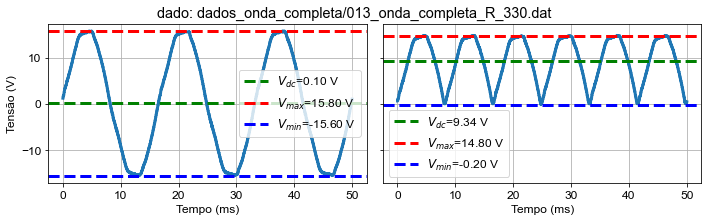

In [13]:
#----
fig,ax = plt.subplots(1,2,figsize=(10,3), sharey=True)
#------------------------
ax0=ax[0]
#--
ax0.plot(1e3*df['tempo(s)'],df['ch1(V)'])
ax0.axhline(V1med,color='green',linestyle='--',label='$V_{dc}$'+'={:3.2f} V'.format(V1med))
ax0.axhline(V1max,color='red',linestyle='--',label='$V_{max}$'+'={:3.2f} V'.format(V1max))
ax0.axhline(V1min,color='blue',linestyle='--',label='$V_{min}$'+'={:3.2f} V'.format(V1min))
#--
ax0.grid(True)
ax0.set_xlabel('Tempo (ms)')
ax0.set_ylabel('Tensão (V)')
ax0.legend(loc='best')
#------------------------
ax0=ax[1]
ax0.plot(1e3*df['tempo(s)'],df['ch2(V)'])
#--
ax0.axhline(V2med,color='green',linestyle='--',label='$V_{dc}$'+'={:3.2f} V'.format(V2med))
ax0.axhline(V2max,color='red',linestyle='--',label='$V_{max}$'+'={:3.2f} V'.format(V2max))
ax0.axhline(V2min,color='blue',linestyle='--',label='$V_{min}$'+'={:3.2f} V'.format(V2min))
#--
ax0.grid(True)
ax0.set_xlabel('Tempo (ms)')
#ax0.set_ylabel('Tensão (V)')
ax0.legend(loc='best')
#------------------
plt.tight_layout()
#----
st = fig.suptitle('dado: '+file)
# shift subplots down:
st.set_y(1.02)
#---
#plt.savefig(file[0:-4]+'_fig.pdf')

## Loading and plotting multiple files at once

In [14]:
from myst_nb import glue
glue("file_print",pd.Series(file_list))

0       dados_onda_completa/013_onda_completa_R_330.dat
1     dados_onda_completa/013_onda_completa_R_330_fi...
2     dados_onda_completa/014_onda_completa_C_R_330.dat
3     dados_onda_completa/014_onda_completa_C_R_330_...
4     dados_onda_completa/015_onda_completa_C_R_352.dat
5     dados_onda_completa/015_onda_completa_C_R_352_...
6     dados_onda_completa/016_onda_completa_C_R_412.dat
7     dados_onda_completa/016_onda_completa_C_R_412_...
8     dados_onda_completa/017_onda_completa_C_R_510.dat
9     dados_onda_completa/017_onda_completa_C_R_510_...
10    dados_onda_completa/018_onda_completa_C_R_610.dat
11    dados_onda_completa/018_onda_completa_C_R_610_...
12    dados_onda_completa/019_onda_completa_C_R_820.dat
13    dados_onda_completa/019_onda_completa_C_R_820_...
14    dados_onda_completa/020_onda_completa_C_R_1000...
15    dados_onda_completa/020_onda_completa_C_R_1000...
16    dados_onda_completa/021_onda_completa_C_R_1200...
17    dados_onda_completa/021_onda_completa_C_R_

Now that we know how to handle a single file, we can use a `for` loop to sequentially open and process all files. For example, I manually extracted from the file names the values of resistance associated with each file:

{glue}`file_print`

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

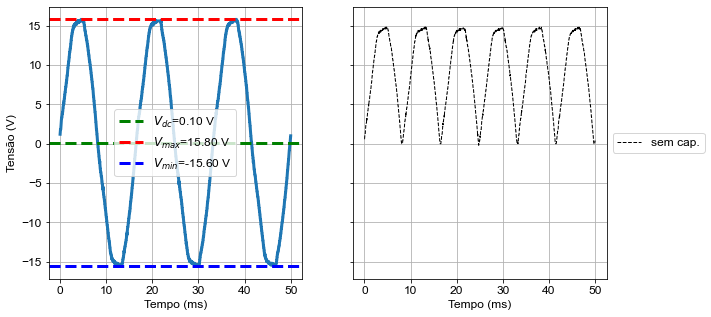

In [15]:
res_val = np.array([327,327,349,404,505,603,820,993,1185,2640,4640,8880,1e8])
#----------------
#mapa de cores
cm=plt.get_cmap('viridis')
norm = colors.Normalize(vmin = 330,vmax = 1e4)
#----------------
#initialize python lists to store the relevant quantities
vmax_vec = [] # max voltage
vmed_vec = [] # mean value
vrip_vec = [] # ripple voltage
label_vec = [] # label
#---
fig,ax = plt.subplots(1,2,figsize=(10,5), sharey=True)
for ii,file in enumerate(file_list):#[1:-3]
    #----
    df = pd.read_csv(file,sep='\t') # DataFrame segundo Pandasdf
    df.columns = ['tempo(s)','ch1(V)','ch2(V)']
    #----
    V1med = np.mean(df['ch1(V)'])
    V1max = np.max(df['ch1(V)'])
    V1min = np.min(df['ch1(V)'])
    #---
    V2med = np.mean(df['ch2(V)'])
    V2max = np.max(df['ch2(V)'])
    V2min = np.min(df['ch2(V)'])
    #--
    vmax_vec.append(V2max)
    vmed_vec.append(V2med)
    vrip_vec.append(V2max-V2min)
    #----
    #------------------------
    #grafica apenas o primeiro
    if ii==0:
        ax0=ax[0]
        #--
        ax0.plot(1e3*df['tempo(s)'],df['ch1(V)'])
        ax0.axhline(V1med,color='green',linestyle='--',label='$V_{dc}$'+'={:3.2f} V'.format(V1med))
        ax0.axhline(V1max,color='red',linestyle='--',label='$V_{max}$'+'={:3.2f} V'.format(V1max))
        ax0.axhline(V1min,color='blue',linestyle='--',label='$V_{min}$'+'={:3.2f} V'.format(V1min))
        #--
        ax0.grid(True)
        ax0.set_xlabel('Tempo (ms)')
        ax0.set_ylabel('Tensão (V)')
        ax0.legend(loc='best')
            
    #------------------------
    ax0=ax[1]
    if ii==0: # different label in this case
        label_vec.append('sem cap.')
        ax0.plot(1e3*df['tempo(s)'],df['ch2(V)'], lw=1,ls='--',
                 color='k',
                 label=label_vec[ii])
    elif ii==len(res_val)-1: # different label in this case
        label_vec.append('aberto (sem res.)')
        ax0.plot(1e3*df['tempo(s)'],df['ch2(V)'], lw=1,ls='--',
                 color=cm((norm(res_val[ii])**(0.1))),
                 label=label_vec[ii])
    else: # common labels
        label_vec.append('{:}'.format(res_val[ii]))
        ax0.plot(1e3*df['tempo(s)'],df['ch2(V)'], lw=1,
                 color=cm((norm(res_val[ii])**(0.1))),
                 label=label_vec[ii])
    #--
    ax0.grid(True)
    ax0.set_xlabel('Tempo (ms)')
    #ax0.set_ylabel('Tensão (V)')
    ax0.legend(loc='center left',bbox_to_anchor=(1,0.5))
    #------------------
plt.tight_layout()
#----
st = fig.suptitle('dado: meia onda ')
# shift subplots down:
st.set_y(1.02)
#---
# plt.savefig('todos_dados_meia_onda'+'_fig.pdf')
#plt.savefig('todos_dados_onda_completa'+'_fig.pdf')

## Characteristics of the diode-rectified voltage source
Below we explore the function `curve_fit` from the [Scipy package](https://www.scipy.org/) (loaded at the beggining of this file with `from scipy.optimize import curve_fit`

### Fitting model to data

In [64]:
Rinverse = 1e3/res_val # inverse of resistance in mS ([S]=1/[Ohm])
T=1/60 # period 
#------------------------------------
#define fittting function
#theory
vmax=np.mean(vmax_vec) # we assume the input voltagevmax_vec is approximately constant during the experiment, verify!!
def vripple(r,c0):
    return vmax_vec[0]*(1-np.exp(-T/(r*c0)) )
pfit, pcov = curve_fit(vripple, res_val,vrip_vec, p0=22e-6)
c0=pfit[0]
print('fitted capacitance, c=',c0)

fitted capacitance, c= 5.475089763087214e-05


### Comparing data and fitted model

/Users/gsw/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/Users/gsw/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


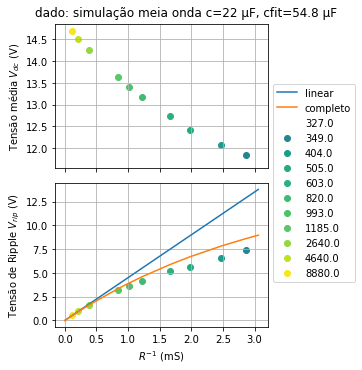

In [65]:
#------------------------------------
#Generate the "theory" curves from our fitted model
vripT1_vec= (vmax_vec[0])/(c0*res_val)*T #linearizado
vripT2_vec= vmax_vec[0]*(1 - np.exp(-T/(res_val*c0)) ) #completo
#------------------------------------
fig,ax = plt.subplots(2,1,figsize=(5,5), sharex=True)
ax0=ax[0]
ax0.grid(True)
ax0.set_ylabel('Tensão média $V_{dc}$ (V)')
#------------------------------------
for ii,r0 in enumerate(res_val):
    # this if is to skip the case with no capacitor (ii=0) and no resistor (ii=12)
    if (ii>=1 and ii<len(res_val)-1): 
        ax[0].scatter(Rinverse[ii],vmed_vec[ii],
                    color=cm((norm(res_val[ii])**(1/8))),
                    label=label_vec[ii])
        ax[1].scatter(Rinverse[ii],vrip_vec[ii],
                    color=cm((norm(res_val[ii])**(1/8))),
                    label=label_vec[ii])
#---------------
ax0=ax[1]
ax0.grid(True)
#-------------------
ax0.plot(Rinverse,vripT1_vec,'-',label ='linear')
ax0.plot(Rinverse,vripT2_vec,'-',label = 'completo')

ax0.set_ylabel('Tensão de Ripple $V_{rip}$ (V)')
ax0.set_xlabel('$R^{-1}$ (mS)')
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(loc='center left',bbox_to_anchor=(1,1))
#----
st = fig.suptitle('dado: simulação meia onda c=22 μF, cfit={:2.1f} μF'.format(1e6*c0))
# shift subplots down:
st.set_y(1.02)
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
#plt.savefig('analise_meia_onda_teoria'+'_fig.png', bbox_inches='tight')

## Generating time traces for each data

Let's say you are not sure about the what the min/max/mean script above did and want to visually inspect the result, **you should always do this, never trust automation without double-checking the results**. 
* Below we show an example of how could you generate a time-trace plot for each experimental curve and make sure your script is doing the right thing.
* It will save multiple files in the current folder `plt.savefig(file[0:-4]+'_fig.png')`, each containing the max/min/mean identification for each dataset

In [66]:
for file in file_list:
    #----
    df = pd.read_csv(file,sep='\t') # DataFrame segundo Pandasdf
    df.columns = ['tempo(s)','ch1(V)','ch2(V)']
    #----
    V1med = np.mean(df['ch1(V)'])
    V1max = np.max(df['ch1(V)'])
    V1min = np.min(df['ch1(V)'])
    print('tensões=',[V1med,V1max,V1min])
    #---
    V2med = np.mean(df['ch2(V)'])
    V2max = np.max(df['ch2(V)'])
    V2min = np.min(df['ch2(V)'])
    print('tensões=',[V2med,V2max,V2min])
    #----
    fig,ax = plt.subplots(1,2,figsize=(10,3), sharey=True)
    #------------------------
    ax0=ax[0]
    #--
    ax0.plot(1e3*df['tempo(s)'],df['ch1(V)'])
    ax0.axhline(V1med,color='green',linestyle='--',label='$V_{dc}$'+'={:3.2f} V'.format(V1med))
    ax0.axhline(V1max,color='red',linestyle='--',label='$V_{max}$'+'={:3.2f} V'.format(V1max))
    ax0.axhline(V1min,color='blue',linestyle='--',label='$V_{min}$'+'={:3.2f} V'.format(V1min))
    #--
    ax0.grid(True)
    ax0.set_xlabel('Tempo (ms)')
    ax0.set_ylabel('Tensão (V)')
    ax0.legend(loc='best')
    #------------------------
    ax0=ax[1]
    ax0.plot(1e3*df['tempo(s)'],df['ch2(V)'])
    #--
    ax0.axhline(V2med,color='green',linestyle='--',label='$V_{dc}$'+'={:3.2f} V'.format(V2med))
    ax0.axhline(V2max,color='red',linestyle='--',label='$V_{max}$'+'={:3.2f} V'.format(V2max))
    ax0.axhline(V2min,color='blue',linestyle='--',label='$V_{min}$'+'={:3.2f} V'.format(V2min))
    #--
    ax0.grid(True)
    ax0.set_xlabel('Tempo (ms)')
    #ax0.set_ylabel('Tensão (V)')
    ax0.legend(loc='best')
    #------------------
    plt.tight_layout()
    #----
    st = fig.suptitle('dado: '+file)
    # shift subplots down:
    st.set_y(1.02)
    #---
    plt.savefig(file[0:-4]+'_fig.png')
    plt.close()

tensões= [0.09839999999999946, 15.8, -15.6]
tensões= [9.34344, 14.8, -0.2]
tensões= [0.09295999999999985, 15.8, -15.6]
tensões= [11.68384, 14.8, 7.4]
tensões= [0.09519999999999963, 15.8, -15.6]
tensões= [11.8356, 15.0, 7.6]
tensões= [0.09335999999999949, 15.8, -15.6]
tensões= [12.064160000000001, 14.8, 8.200000000000001]
tensões= [0.09704000000000014, 15.8, -15.6]
tensões= [12.42704, 14.8, 9.2]
tensões= [0.10192000000000007, 15.8, -15.6]
tensões= [12.732, 15.0, 9.8]
tensões= [0.10503999999999979, 15.8, -15.6]
tensões= [13.176, 15.0, 10.8]
tensões= [0.10567999999999957, 15.8, -15.6]
tensões= [13.4032, 15.0, 11.4]
tensões= [0.10536000000000022, 16.0, -15.8]
tensões= [13.627120000000001, 15.0, 11.8]
tensões= [0.10728000000000029, 15.8, -15.6]
tensões= [14.259520000000002, 15.0, 13.4]
tensões= [0.10799999999999964, 15.8, -15.6]
tensões= [14.5064, 15.0, 14.0]
tensões= [0.1056, 15.8, -15.6]
tensões= [14.691679999999998, 15.0, 14.4]
tensões= [0.10863999999999978, 16.0, -15.6]
tensões= [15.179